In [28]:
import numpy as np
import pandas as pd
import pandasql as ps
from matplotlib import pyplot as plt
import seaborn as sns
from random import sample
import pingouin as pg

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

# reading the data 


In [29]:
row_df = pd.read_excel('chen_shalev_labeld_row_data.xlsx')


In [30]:
df = row_df[:]  # object copy

# Isolating relevant columns - label and programs

In [31]:
df_programs_labels = df[['פעילויות שעבר בתכנית','label']]

# cleaning "program" column 

In [32]:

programs_list = [  'חיפוש עבודה מונחה'
                    ,'סדנת מכינה השמתית מעגלי תעסוקה'
                    ,'ייעוץ תעסוקתי'
                    ,'סדנת מכינה תהליכית מעגלי תעסוקה'
                    ,'סדנת יישומי מחשב מעגלי תעסוקה'
                    ,'שיחת אימון אישי'
                    ,'ייעוץ פסיכולוגי'
                    ,'סדנת ליווי בקבוצה קטנה'
                    ,'עברית תעסוקתית'
                    ,'זימון למנהל'
                    ,'סדנת מכינה השמתית'
                    ,'סדנת שינוי'
                    ,'סדנת מכינה מחשבים מעגלי תעסוקה'
                    ,'סדנת מכינה מעגלי תעסוקה'
                    ,'יישומי מחשב מעגלי תעסוקה'
                    ,'סדנת השמה פלוס מעגלי תעסוקה'
                    ,'סדנת מכינה תהליכית'
                    ,'סדנת מכינת השמתית מעגלי תעסוקה'
                    ,'סדנת השמה'
                    ,'מכינה תהליכית מעגלי תעסוקה'
                    ,'סדנת תהליך'
                    ,'סדנת מכינה מעורב מעגלי תעסוקה'
                    ,'סדנת השמה מעגלי תעסוקה'
                    ,'סדנת רכבת מעגלי תעסוקה'
                    ,'סדנת תהליך מעגלי תעסוקה'
                    ,'קורס יישומי מחשב'
                    ,'יישומי מחשב מעגלי תעסוקה'
                    ,'קורס יישומי מחשב'
                    ,'סדנת שינוי מעגלי תעסוקה'
                    ,'מכינה השמתית'
                 ,]


In [50]:
programs = df_programs_labels['פעילויות שעבר בתכנית']

l =[]
for i in programs:
    p = ''
    for x in programs_list:
        if x in str(i):
            p = p + x + ','
            
    if p == '':
        p= None 
        
    l.append(p)
     

In [51]:
df_programs_labels.loc[:,'פעילויות שעבר בתכנית'] = l

# convert "program" column to categorial variables

In [52]:
prog =  df_programs_labels['פעילויות שעבר בתכנית'].str.get_dummies(sep=',')
prog.columns = ['פעילויות שעבר בתכנית_' + str(x) for x in prog.columns]

### creating new column - number of programs which each person Attended

In [53]:
pn = prog.sum(axis=1).to_frame()
pn.columns = ['number_of_programs']

In [54]:
program_summary = pd.concat([prog,pn],axis=1)

In [55]:
l = list(df_programs_labels.columns)
index = l.index('פעילויות שעבר בתכנית')

In [56]:
DF = pd.concat([df_programs_labels.iloc[:,0:index],program_summary,df_programs_labels.iloc[:,index:]],axis = 1)
DF.head(3)

,פעילויות שעבר בתכנית_זימון למנהל,פעילויות שעבר בתכנית_חיפוש עבודה מונחה,פעילויות שעבר בתכנית_ייעוץ פסיכולוגי,פעילויות שעבר בתכנית_ייעוץ תעסוקתי,פעילויות שעבר בתכנית_יישומי מחשב מעגלי תעסוקה,פעילויות שעבר בתכנית_מכינה השמתית,פעילויות שעבר בתכנית_מכינה תהליכית מעגלי תעסוקה,פעילויות שעבר בתכנית_סדנת השמה,פעילויות שעבר בתכנית_סדנת יישומי מחשב מעגלי תעסוקה,פעילויות שעבר בתכנית_סדנת ליווי בקבוצה קטנה,פעילויות שעבר בתכנית_סדנת מכינה השמתית,פעילויות שעבר בתכנית_סדנת מכינה השמתית מעגלי תעסוקה,פעילויות שעבר בתכנית_סדנת מכינה תהליכית,פעילויות שעבר בתכנית_סדנת מכינה תהליכית מעגלי תעסוקה,פעילויות שעבר בתכנית_סדנת שינוי,פעילויות שעבר בתכנית_סדנת תהליך,פעילויות שעבר בתכנית_עברית תעסוקתית,פעילויות שעבר בתכנית_קורס יישומי מחשב,פעילויות שעבר בתכנית_שיחת אימון אישי,number_of_programs,פעילויות שעבר בתכנית,label
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,4,"חיפוש עבודה מונחה,שיחת אימון אישי,סדנת שינוי,ס...",4
1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,4,"שיחת אימון אישי,סדנת מכינה השמתית,סדנת מכינה ת...",3
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,"ייעוץ תעסוקתי,שיחת אימון אישי,",2


# Table of absolute and percennteg of labels within programs

In [57]:
DFF = DF.drop(['פעילויות שעבר בתכנית'], axis=1)
DF_grouped_sum = DFF.groupby(['label']).sum()
DF_grouped_sum.columns = [i.replace('פעילויות שעבר בתכנית_','') for i in DF_grouped_sum.columns ]

# calculating percenteg
DF_label_within_prog_perc = round(DF_grouped_sum.groupby(['label']).sum()/ DF_grouped_sum.sum(),2)

# renamimg index
DF_label_within_prog_perc = DF_label_within_prog_perc.rename(columns={'A': 'a'}, index={i:f'{i}-fraction' for i in DF_label_within_prog_perc.index.values})

# comcating percenteg and absolut numbers tables
DF_summary = pd.concat([DF_grouped_sum,DF_label_within_prog_perc],axis = 0)

DF_summary

,זימון למנהל,חיפוש עבודה מונחה,ייעוץ פסיכולוגי,ייעוץ תעסוקתי,יישומי מחשב מעגלי תעסוקה,מכינה השמתית,מכינה תהליכית מעגלי תעסוקה,סדנת השמה,סדנת יישומי מחשב מעגלי תעסוקה,סדנת ליווי בקבוצה קטנה,סדנת מכינה השמתית,סדנת מכינה השמתית מעגלי תעסוקה,סדנת מכינה תהליכית,סדנת מכינה תהליכית מעגלי תעסוקה,סדנת שינוי,סדנת תהליך,עברית תעסוקתית,קורס יישומי מחשב,שיחת אימון אישי,number_of_programs
label,,,,,,,,,,,,,,,,,,,,
1,14.00,67.00,12.00,265.00,1.00,136.00,23.00,5.00,1.00,0.00,135.00,5.00,363.00,23.00,131.00,3.00,42.00,0.00,1231.00,2457.00
2,55.00,281.00,84.00,979.00,4.00,456.00,82.00,4.00,4.00,16.00,456.00,14.00,1275.00,82.00,507.00,10.00,133.00,1.00,4200.00,8643.00
3,80.00,294.00,107.00,824.00,1.00,347.00,67.00,2.00,1.00,12.00,347.00,10.00,1016.00,67.00,395.00,7.00,72.00,0.00,3786.00,7435.00
4,636.00,1532.00,1756.00,6631.00,11.00,2106.00,356.00,18.00,11.00,50.00,2102.00,45.00,6841.00,356.00,2550.00,60.00,674.00,14.00,23151.00,48900.00
1-fraction,0.02,0.03,0.01,0.03,0.06,0.04,0.04,0.17,0.06,0.00,0.04,0.07,0.04,0.04,0.04,0.04,0.05,0.00,0.04,0.04
2-fraction,0.07,0.13,0.04,0.11,0.24,0.15,0.16,0.14,0.24,0.21,0.15,0.19,0.13,0.16,0.14,0.12,0.14,0.07,0.13,0.13
3-fraction,0.10,0.14,0.05,0.09,0.06,0.11,0.13,0.07,0.06,0.15,0.11,0.14,0.11,0.13,0.11,0.09,0.08,0.00,0.12,0.11
4-fraction,0.81,0.70,0.90,0.76,0.65,0.69,0.67,0.62,0.65,0.64,0.69,0.61,0.72,0.67,0.71,0.75,0.73,0.93,0.72,0.73


# Table of absolute and percennteg of programs within labels

In [58]:
# calculating percenteg
DF_prog_within_label_perc = round(DF_grouped_sum.div(DF_grouped_sum["number_of_programs"], axis=0), 3)

# renamimg index
DF_prog_within_label_perc_renamed = DF_prog_within_label_perc.rename(columns={'A': 'a'}, index={i:f'{i}-fraction' for i in DF_prog_within_label_perc.index.values})

# comcating percenteg and absolut numbers tables
DF_summary = pd.concat([DF_grouped_sum,DF_prog_within_label_perc_renamed],axis = 0)

DF_summary

,זימון למנהל,חיפוש עבודה מונחה,ייעוץ פסיכולוגי,ייעוץ תעסוקתי,יישומי מחשב מעגלי תעסוקה,מכינה השמתית,מכינה תהליכית מעגלי תעסוקה,סדנת השמה,סדנת יישומי מחשב מעגלי תעסוקה,סדנת ליווי בקבוצה קטנה,סדנת מכינה השמתית,סדנת מכינה השמתית מעגלי תעסוקה,סדנת מכינה תהליכית,סדנת מכינה תהליכית מעגלי תעסוקה,סדנת שינוי,סדנת תהליך,עברית תעסוקתית,קורס יישומי מחשב,שיחת אימון אישי,number_of_programs
label,,,,,,,,,,,,,,,,,,,,
1,14.000,67.000,12.000,265.000,1.0,136.000,23.000,5.000,1.0,0.000,135.000,5.000,363.000,23.000,131.000,3.000,42.000,0.0,1231.000,2457.0
2,55.000,281.000,84.000,979.000,4.0,456.000,82.000,4.000,4.0,16.000,456.000,14.000,1275.000,82.000,507.000,10.000,133.000,1.0,4200.000,8643.0
3,80.000,294.000,107.000,824.000,1.0,347.000,67.000,2.000,1.0,12.000,347.000,10.000,1016.000,67.000,395.000,7.000,72.000,0.0,3786.000,7435.0
4,636.000,1532.000,1756.000,6631.000,11.0,2106.000,356.000,18.000,11.0,50.000,2102.000,45.000,6841.000,356.000,2550.000,60.000,674.000,14.0,23151.000,48900.0
1-fraction,0.006,0.027,0.005,0.108,0.0,0.055,0.009,0.002,0.0,0.000,0.055,0.002,0.148,0.009,0.053,0.001,0.017,0.0,0.501,1.0
2-fraction,0.006,0.033,0.010,0.113,0.0,0.053,0.009,0.000,0.0,0.002,0.053,0.002,0.148,0.009,0.059,0.001,0.015,0.0,0.486,1.0
3-fraction,0.011,0.040,0.014,0.111,0.0,0.047,0.009,0.000,0.0,0.002,0.047,0.001,0.137,0.009,0.053,0.001,0.010,0.0,0.509,1.0
4-fraction,0.013,0.031,0.036,0.136,0.0,0.043,0.007,0.000,0.0,0.001,0.043,0.001,0.140,0.007,0.052,0.001,0.014,0.0,0.473,1.0


# bar graphs


#### --- first lets prepere our data frame

In [59]:
# copy to a short name
df = DF_label_within_prog_perc

# transpose the df
dft = df.T

# removing uneccesry strings \
dft.columns = [ i.replace('-fraction','') for i in  dft.columns] 

# convert index into column
dft['programs'] = dft.index

In [60]:
# reorgenized the data frame for easy plot
# pay attention that the code reversing the hebrew strings

p =[]
l =[]
v =[] 
for i in dft['programs']:
    for j in [1,2,3,4]:
        p.append(i[::-1])
        l.append(int(j))
        v.append(dft[dft['programs'] == i].loc[i][j-1])
        
d = pd.DataFrame({'program':p,'label':l,'proportion_within_program':v})

d.head()

,program,label,proportion_within_program
0,להנמל ןומיז,1,0.02
1,להנמל ןומיז,2,0.07
2,להנמל ןומיז,3,0.10
3,להנמל ןומיז,4,0.81
4,החנומ הדובע שופיח,1,0.03


## ploting the results

#### each plot is per program such that the x axis represent the label and the y axis represent the proportion within the specific program

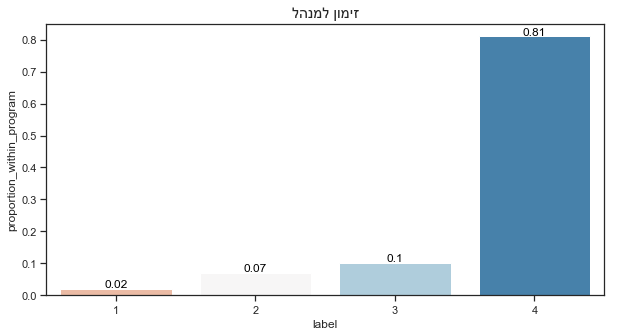

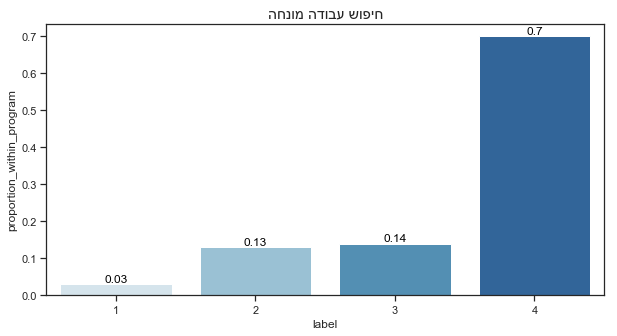

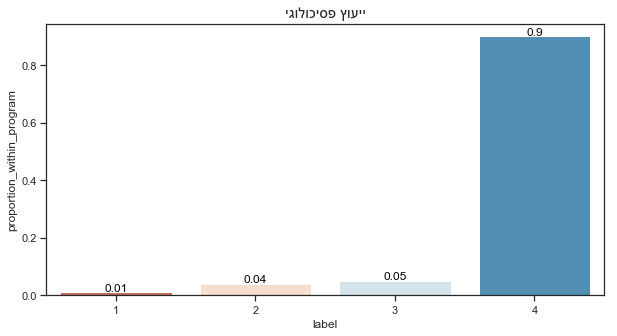

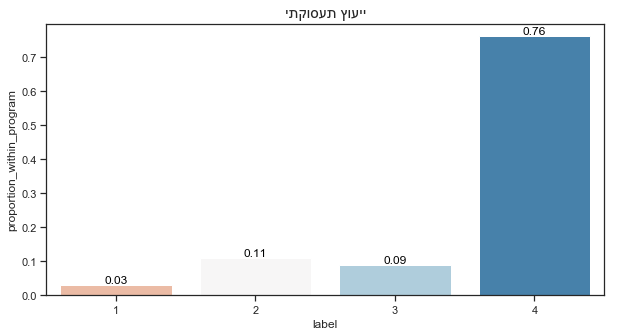

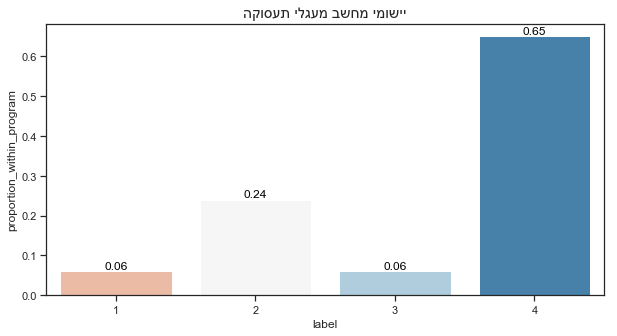

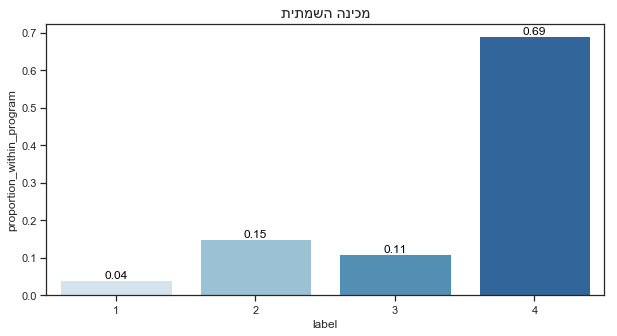

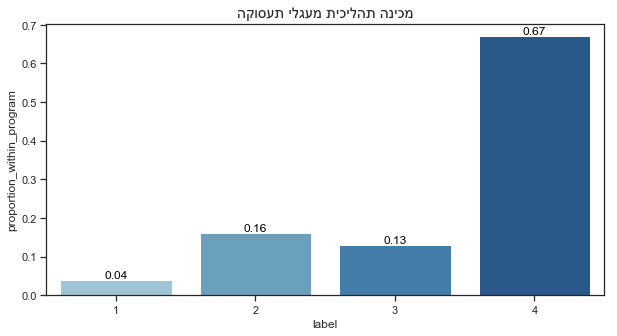

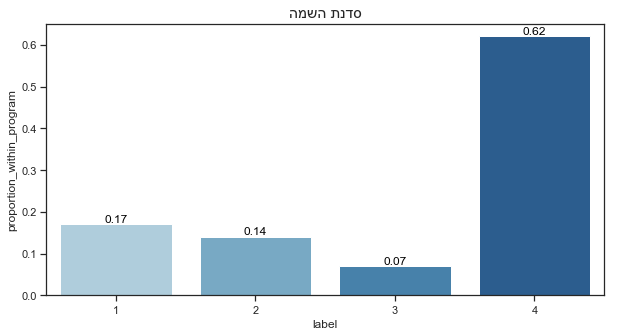

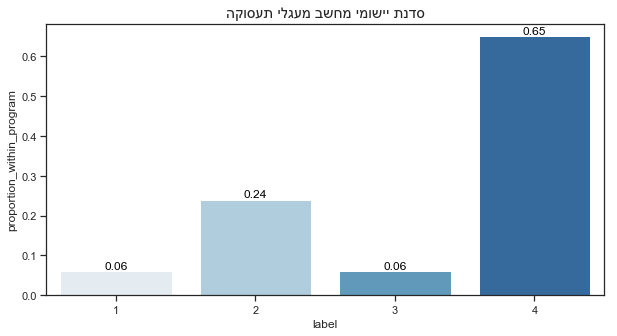

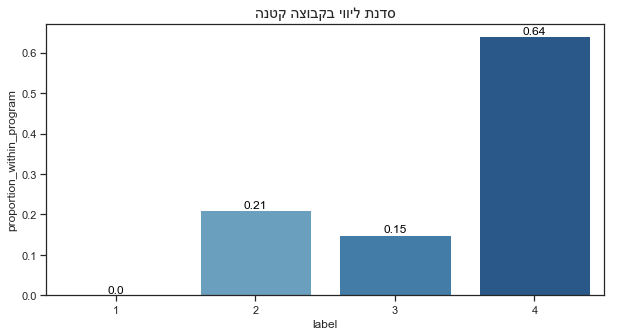

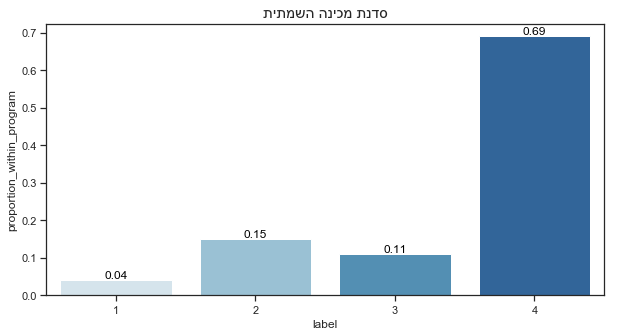

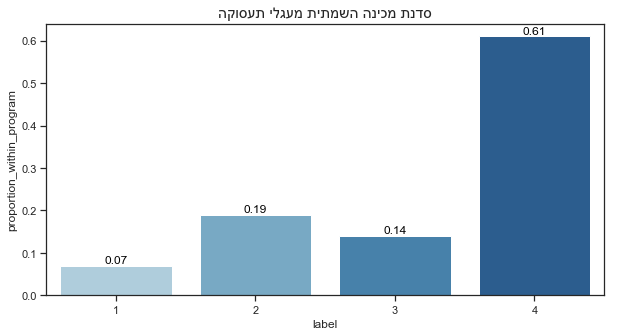

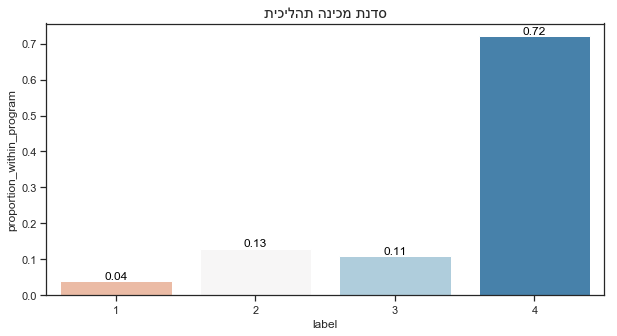

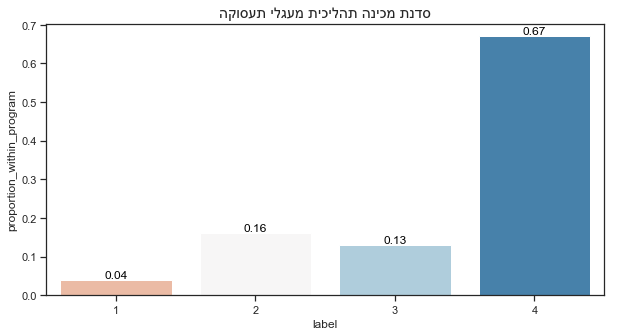

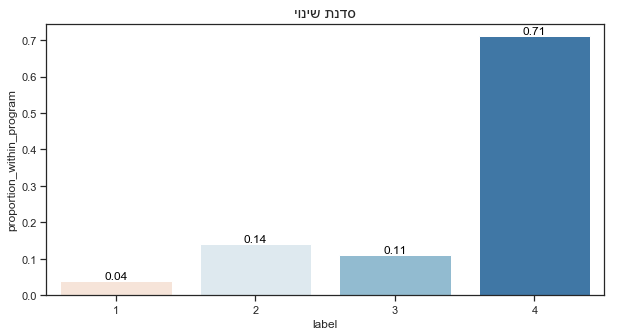

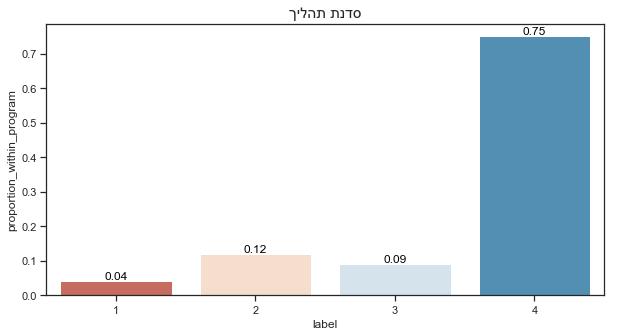

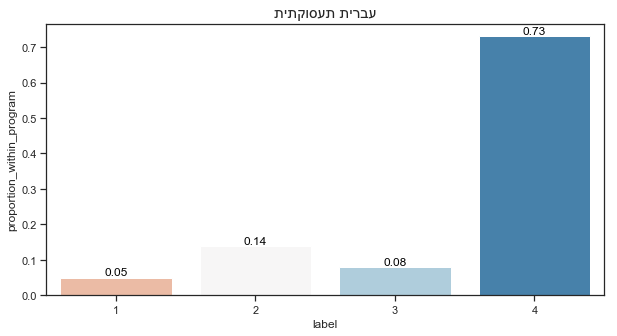

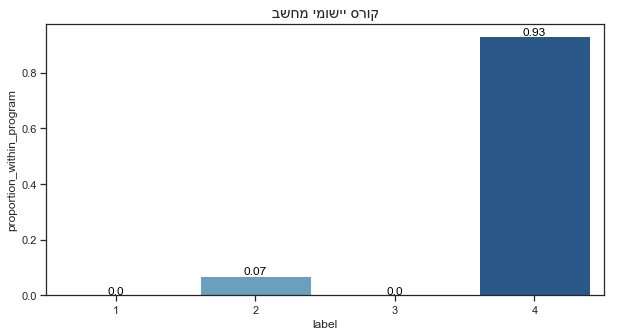

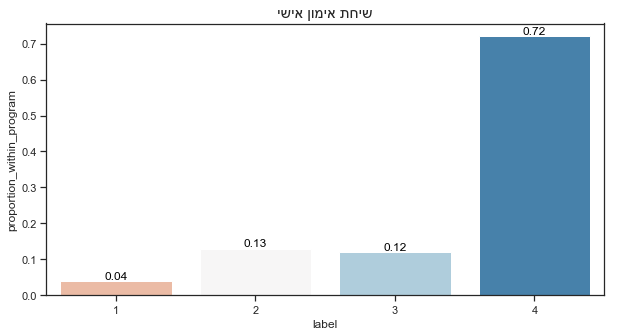

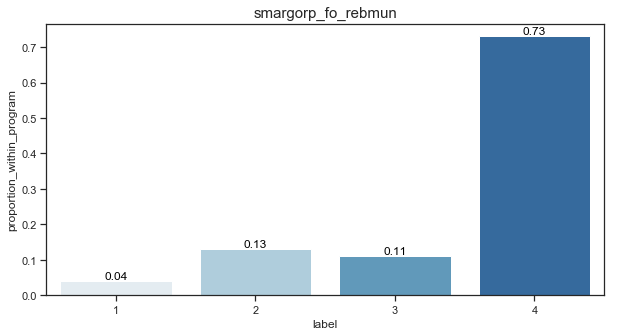

In [61]:
for i in d['program'].unique():
    df = d[d['program'] == i]
    plt.figure(figsize=(10,5))
    groupedvalues=df.groupby('label').sum().reset_index()
    pal = sns.color_palette(sns.color_palette("RdBu_r",sample(range(1,10),1)[0]+3 ), len(groupedvalues))
    g=sns.barplot(x='label',y='proportion_within_program',data=groupedvalues, palette=np.array(pal[::-1]))

    for index, row in groupedvalues.iterrows():
        g.text(row.name,row.proportion_within_program+0.005, round(row.proportion_within_program,2), color='black', ha="center")

    g.set_title(i,size = 15)
    plt.show()


# let's check for difference of the number of programs between the different labels by using ANOVA

In [62]:
DF_grouped_sum

,זימון למנהל,חיפוש עבודה מונחה,ייעוץ פסיכולוגי,ייעוץ תעסוקתי,יישומי מחשב מעגלי תעסוקה,מכינה השמתית,מכינה תהליכית מעגלי תעסוקה,סדנת השמה,סדנת יישומי מחשב מעגלי תעסוקה,סדנת ליווי בקבוצה קטנה,סדנת מכינה השמתית,סדנת מכינה השמתית מעגלי תעסוקה,סדנת מכינה תהליכית,סדנת מכינה תהליכית מעגלי תעסוקה,סדנת שינוי,סדנת תהליך,עברית תעסוקתית,קורס יישומי מחשב,שיחת אימון אישי,number_of_programs
label,,,,,,,,,,,,,,,,,,,,
1,14,67,12,265,1,136,23,5,1,0,135,5,363,23,131,3,42,0,1231,2457
2,55,281,84,979,4,456,82,4,4,16,456,14,1275,82,507,10,133,1,4200,8643
3,80,294,107,824,1,347,67,2,1,12,347,10,1016,67,395,7,72,0,3786,7435
4,636,1532,1756,6631,11,2106,356,18,11,50,2102,45,6841,356,2550,60,674,14,23151,48900


In [46]:
aov = pg.anova(data=DF, dv='number_of_programs', between='label', detailed=True)
print(aov)

   Source          SS     DF       MS       F        p-unc    np2
0   label     364.634      3  121.545  58.279  1.31385e-37  0.003
1  Within  116759.426  55985    2.086       -            -      -


#### Its sgnificaly shown that there is different between the different labels groups 
#### In the following step we will use Tukey post hoc test to search for the source of the difference between  all  pairs combinations

In [47]:
pt = pg.pairwise_tukey( data=DF,dv='number_of_programs', between='label')
print(pt)

   A  B  mean(A)  mean(B)   diff     se       tail      T   p-tukey  hedges
0  1  2    0.967    1.140 -0.174  0.033  two-sided -5.251  0.001000  -0.120
1  1  3    0.967    1.086 -0.119  0.034  two-sided -3.548  0.002201  -0.082
2  1  4    0.967    1.253 -0.287  0.030  two-sided -9.696  0.001000  -0.198
3  2  3    1.140    1.086  0.055  0.024  two-sided  2.277  0.103415   0.038
4  2  4    1.140    1.253 -0.113  0.018  two-sided -6.224  0.001000  -0.078
5  3  4    1.086    1.253 -0.168  0.019  two-sided -8.862  0.001000  -0.116


### We can say confidently that ,except  the pair 2 & 3 which there the p_value is equal to 0.1,  between all the pairs means exist difference such that the means decares with the the labels decreasing